# Introduction

## I am going to apply CNN on the 64x64 Grayscaled data and check the results

In [109]:
# importing the libraries

import numpy as np
import pandas as pd

from tensorflow import keras
from keras.layers import Conv2D,MaxPool2D,Dense,Dropout,Flatten
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import confusion_matrix

In [66]:
# Set Matplotlib defaults
sns.set_style('darkgrid')
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=25,
    titlepad=10,
)

In [110]:
data = pd.read_csv("hmnist_8_8_RGB.csv")      # reading the data

In [111]:
data.shape

(5000, 193)

In [55]:
data.head()            # first few rows to get idea

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel0183,pixel0184,pixel0185,pixel0186,pixel0187,pixel0188,pixel0189,pixel0190,pixel0191,label
0,190,117,155,167,115,153,157,100,141,168,...,178,92,135,164,85,126,182,106,146,2
1,135,30,53,117,20,47,119,30,54,124,...,126,32,58,164,47,70,151,38,64,2
2,169,89,129,172,86,125,146,72,117,162,...,158,89,133,178,94,134,177,83,123,2
3,171,58,90,183,66,98,150,48,77,181,...,205,91,120,174,57,83,154,52,78,2
4,184,116,151,177,100,138,143,72,117,184,...,181,85,122,194,134,169,196,135,168,2


In [112]:
# splitting the labels and features

Y = data["label"]
data.drop(["label"],axis=1, inplace=True)
X = data

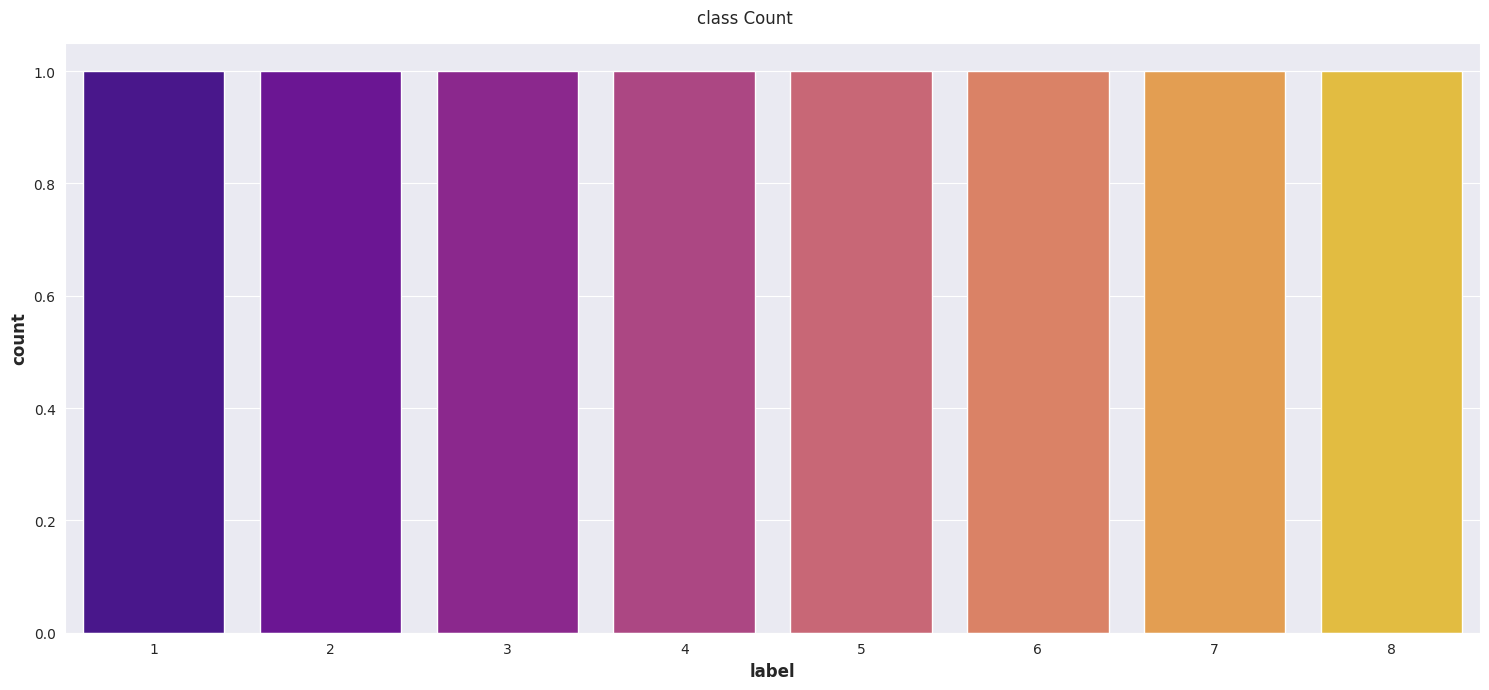

In [57]:
# creating the countplot

plt.figure(figsize=(15,7))
g = sns.countplot(Y.value_counts(), palette="plasma")
plt.suptitle("class Count")
plt.show()

In [58]:
# it is very well balanced
Y.value_counts()         # each are 625 per column (perfect dataset?)

label
2    625
5    625
7    625
6    625
8    625
1    625
4    625
3    625
Name: count, dtype: int64

In [113]:
X = X / 255.0     # scaling

In [114]:
# Label Encoding
from keras.utils import to_categorical # convert to one-hot-encoding for better results
Y = to_categorical(Y)

In [115]:
# Splitting train and test
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size = 0.2, random_state=42)

In [116]:
# Reshaping
x_train = x_train.values.reshape(-1, 8, 8, 3)        # shaping for the Keras
#y_train = y_train.values

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [118]:
x_val = x_val.values.reshape(-1, 8, 8, 3)        # shaping for the Keras
#y_val= y_val.values

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [119]:
print("x_train.shape: ",x_train.shape)
print("x_val.shape: ",x_val.shape)
print("y_train.shape: ",y_train.shape)
print("y_val.shape: ",y_val.shape)

x_train.shape:  (4000, 8, 8, 3)
x_val.shape:  (1000, 8, 8, 3)
y_train.shape:  (4000, 9)
y_val.shape:  (1000, 9)


## ** CNN **

In [120]:
model = Sequential()

model.add(Conv2D(filters = 128, kernel_size = (5,5),padding = 'same',activation ='relu', input_shape = (8,8,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'same',activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'same',activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(256,activation = "relu"))
model.add(Dense(64,activation = "relu"))
model.add(Dense(32,activation = "relu"))

model.add(Dense(9, activation = "softmax"))

In [121]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 8, 8, 128)         9728      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 4, 4, 128)         0         
 g2D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 4, 4, 128)         0         
                                                                 
 conv2d_4 (Conv2D)           (None, 4, 4, 64)          73792     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 2, 2, 64)          0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 2, 2, 64)         

In [122]:
datagen = ImageDataGenerator(
        rotation_range=0.5,
        zoom_range = 0.5,
        width_shift_range=0.5,
        height_shift_range=0.5,
        horizontal_flip=True,
        vertical_flip=True)

datagen.fit(x_train)

In [123]:
model.compile(optimizer = "Adam" , loss = "categorical_crossentropy", metrics=["accuracy"])

In [ ]:
history = model.fit_generator(datagen.flow(x_train,y_train),
                              epochs = 200, validation_data = (x_val,y_val))

Epoch 1/200
125/125 [==============================] - 4s 30ms/step - loss: 0.7171 - accuracy: 0.7160 - val_loss: 0.5717 - val_accuracy: 0.7860
Epoch 2/200
125/125 [==============================] - 3s 27ms/step - loss: 0.6851 - accuracy: 0.7262 - val_loss: 0.5878 - val_accuracy: 0.7790
Epoch 3/200
125/125 [==============================] - 4s 31ms/step - loss: 0.6726 - accuracy: 0.7303 - val_loss: 0.5802 - val_accuracy: 0.7800
Epoch 4/200
125/125 [==============================] - 3s 26ms/step - loss: 0.6976 - accuracy: 0.7215 - val_loss: 0.5737 - val_accuracy: 0.7760
Epoch 5/200
125/125 [==============================] - 3s 27ms/step - loss: 0.6755 - accuracy: 0.7358 - val_loss: 0.5212 - val_accuracy: 0.8000
Epoch 6/200
125/125 [==============================] - 3s 27ms/step - loss: 0.6869 - accuracy: 0.7250 - val_loss: 0.5368 - val_accuracy: 0.8130
Epoch 7/200
125/125 [==============================] - 4s 33ms/step - loss: 0.6818 - accuracy: 0.7228 - val_loss: 0.5067 - val_accuracy:

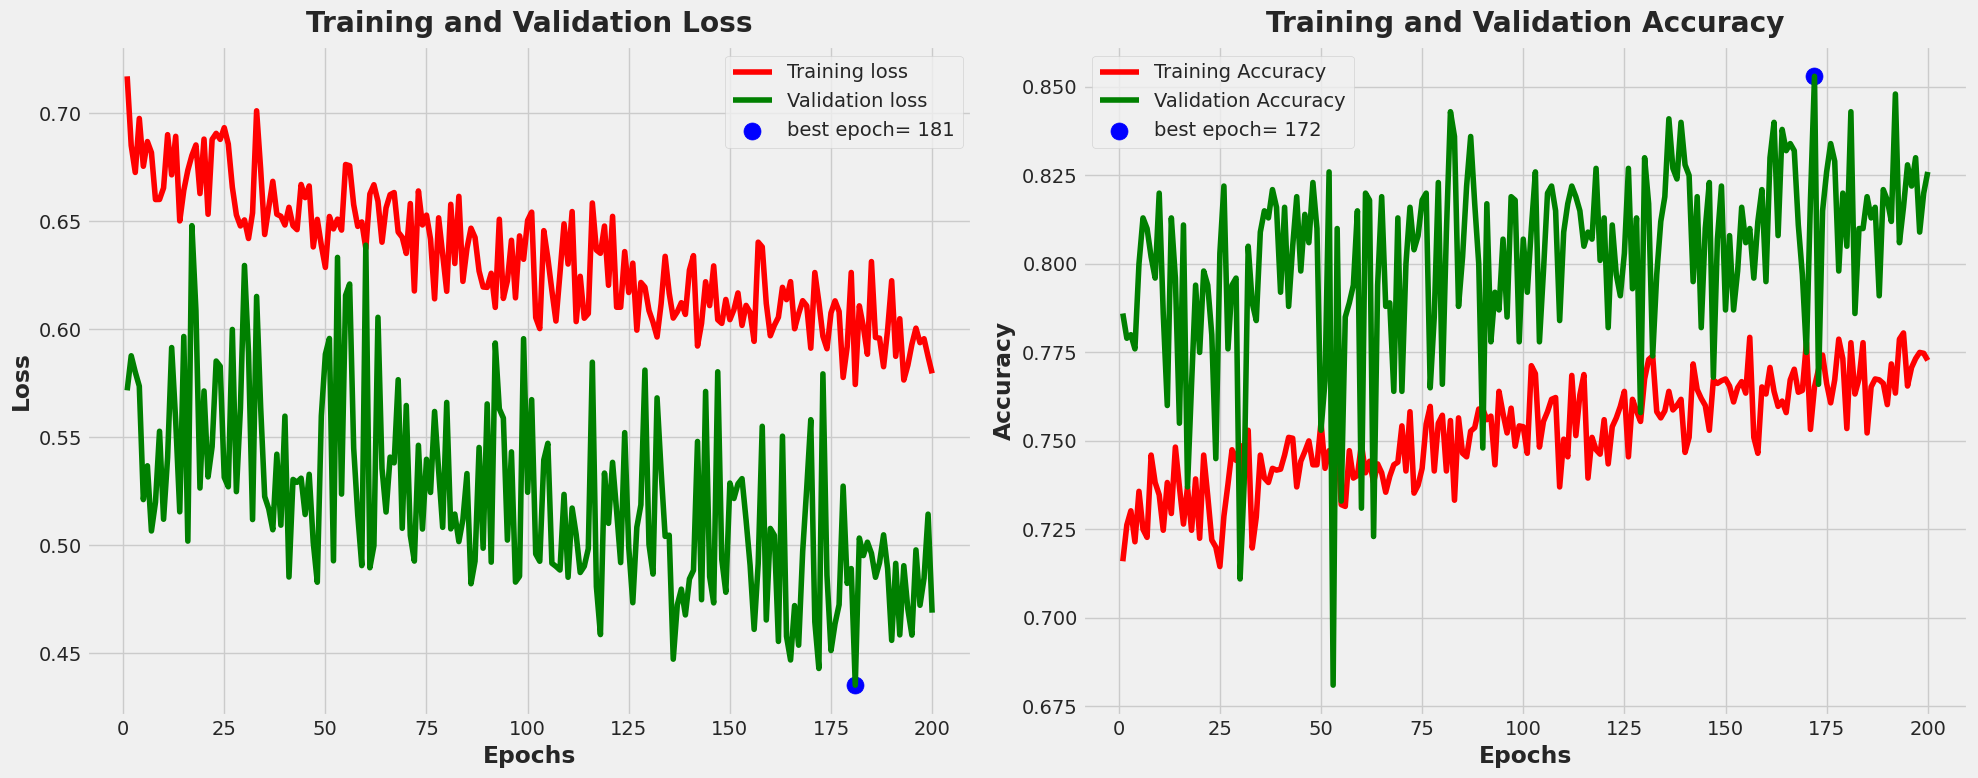

In [133]:
# Define needed variables
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

# Conculusion

## I am quite happy by the result, we can see it's reached almost 90% accuracy which is acceptable for me.